# Homework week 4

## Preparation
- download data  
- keep only columns specified  
- lowercase column names and string values
- replace column name and string value spaces with underscores
- fill missing values with 0
- make the price binary as `above_average`
- split the data into 3 parts train/validation/test 60%/20%/20% using `train_test_split` with `random_state = 1`

In [81]:
#Import packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold


In [42]:
#Download data
data = 'wget https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv'
!wget $data -O homework_data.csv

--2023-10-09 13:40:24--  http://wget/
Resolving wget (wget)... 

failed: Name or service not known.
wget: unable to resolve host address ‘wget’
--2023-10-09 13:40:25--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: ‘homework_data.csv’

homework_data.csv   100%[===================>]   1.41M  4.22MB/s    in 0.3s    

2023-10-09 13:40:26 (4.22 MB/s) - ‘homework_data.csv’ saved [1475504/1475504]

FINISHED --2023-10-09 13:40:26--
Total wall clock time: 1.7s
Downloaded: 1 files, 1.4M in 0.3s (4.22 MB/s)


In [43]:
#Put data in dataframe
df = pd.read_csv('homework_data.csv')
df.head().T

,0,1,2,3,4
Make,BMW,BMW,BMW,BMW,BMW
Model,1 Series M,1 Series,1 Series,1 Series,1 Series
Year,2011,2011,2011,2011,2011
Engine Fuel Type,premium unleaded (required),premium unleaded (required),premium unleaded (required),premium unleaded (required),premium unleaded (required)
Engine HP,335.0,300.0,300.0,230.0,230.0
Engine Cylinders,6.0,6.0,6.0,6.0,6.0
Transmission Type,MANUAL,MANUAL,MANUAL,MANUAL,MANUAL
Driven_Wheels,rear wheel drive,rear wheel drive,rear wheel drive,rear wheel drive,rear wheel drive
Number of Doors,2.0,2.0,2.0,2.0,2.0
Market Category,"Factory Tuner,Luxury,High-Performance","Luxury,Performance","Luxury,High-Performance","Luxury,Performance",Luxury


In [44]:
#Get only the desired columns for the exercise
desired_column = ['Make', 'Model', 'Year', 'Engine HP', 'Engine Cylinders', 'Transmission Type', 'Vehicle Style', 'highway MPG', 'city mpg', 'MSRP']
df = df[desired_column]
df.head().T

,0,1,2,3,4
Make,BMW,BMW,BMW,BMW,BMW
Model,1 Series M,1 Series,1 Series,1 Series,1 Series
Year,2011,2011,2011,2011,2011
Engine HP,335.0,300.0,300.0,230.0,230.0
Engine Cylinders,6.0,6.0,6.0,6.0,6.0
Transmission Type,MANUAL,MANUAL,MANUAL,MANUAL,MANUAL
Vehicle Style,Coupe,Convertible,Coupe,Coupe,Convertible
highway MPG,26,28,28,28,28
city mpg,19,19,20,18,18
MSRP,46135,40650,36350,29450,34500


In [45]:
#clean df columns
df.columns = df.columns.str.lower().str.replace(' ','_') 
#clean df categorical values
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)
for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ','_')

In [46]:
#convert 'year' to object from int64
df['year'] = df['year'].astype(str)

In [47]:
#fill empty columns with 0
columns_to_fill = ['engine_hp', 'engine_cylinders']
df[columns_to_fill] = df[columns_to_fill].fillna(0)
#check columns have been filled
df.isnull().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
msrp                 0
dtype: int64

In [48]:
#set average
above_average = df['msrp'].mean()
#turn price into binary using in-line function
df['above_average'] = df['msrp'].apply(lambda x: 1 if x > above_average else 0)
#remove msrp from dataset
del df['msrp']

In [49]:
#split data
df_full_train, df_test = train_test_split(df, test_size = 0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state=1)

#reset index, not necessary but looks better
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

#split out target (y) values
y_train = df_train.above_average.values
y_test = df_test.above_average.values
y_val = df_val.above_average.values

#remove target (y) values from dataframes
del df_train['above_average']
del df_test['above_average']
del df_val['above_average']

#set list of categorical and numerical variables
numerical_vars = ['engine_hp','engine_cylinders','highway_mpg','city_mpg']
categorical_vars = ['make','model','year','transmission_type','vehicle_style']

## Question 1: ROC AUC feature importance
Use ROC AUC to evaluate feature importance of numerical variables
- For each numerical variable, use it as a score and compute AUC with the `above_average` variable
- Use the training dataset for that
- If your AUC is <0.5, invert this variable by putting a "-" in front ie `-df_train['engine_hp']`

In [54]:
#initialize dictionary to store AUC scores
auc_scores = {}

In [55]:
#loop thru numerical variables and calculate the ROC score
for var in numerical_vars:
    #get auc
    auc = roc_auc_score(y_train, df_train[var])
    #invert variable if score <0.5
    if auc < 0.5:
        auc = roc_auc_score(y_train, -df_train[var])
    auc_scores[var] = auc

In [56]:
auc_scores

{'engine_hp': 0.9171031265539011,
 'engine_cylinders': 0.766116490165669,
 'highway_mpg': 0.6330587871772013,
 'city_mpg': 0.6734244643245233}

## Question 2: Training the model
Apply one-hot encoding using `DictVectorizer` and train the logistic regression with these parameters:
- `LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)`
- What's the AUC of this model on the validation dataset? (round to 3 digits)

In [66]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical_vars + numerical_vars].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [68]:
val_dict = df_val[categorical_vars + numerical_vars].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict_proba(X_val)[:, 1]
churn_decision = (y_pred >= 0.5)
(y_val == churn_decision).mean()

0.9433487201007134

In [69]:
#calculate predicted probabilities for the validation set
y_pred_prob = model.predict_proba(X_val)[:, 1]

#calculate the AUC score
auc_score = roc_auc_score(y_val, y_pred_prob)

auc_score

0.9832432174296007

## Question 3: Precision and Recall
- Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
- For each threshold, compute precision and recall
- Plot them
- At which threshold precision and recall curves intersect?

In [71]:
#set thresholds and initialize lists to store precision and recall values
thresholds = np.arange(0, 1.01, 0.01)
precision_scores = []
recall_scores = []


In [72]:
#calculate precision and recall for each threshold
for threshold in thresholds:
    churn_decision = (y_pred >= threshold)
    precision = precision_score(y_val, churn_decision)
    recall = recall_score(y_val, churn_decision)
    precision_scores.append(precision)
    recall_scores.append(recall)

/home/tsimpson_unix/anaconda3/envs/ml-zoomcamp/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


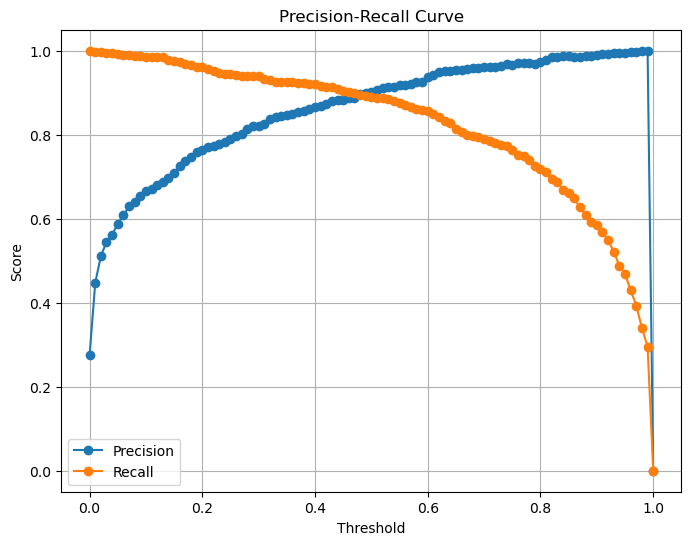

In [73]:
#plot precision and recall curves
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precision_scores, label='Precision', marker='o')
plt.plot(thresholds, recall_scores, label='Recall', marker='o')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()

## Question 4: F1 score
Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both  

This is the formula for computing F1:

`F_1 = 2 \cdot \cfrac{P \cdot R}{P + R}` where p is precision and r is recall

Find the threshold F1 is maximal

In [75]:
#set thresholds and initialize lists to store F1 scores
thresholds = np.arange(0, 1.01, 0.01)
f1_scores = []

In [76]:
#calculate F1 score for each threshold
for threshold in thresholds:
    churn_decision = (y_pred >= threshold)
    f1 = f1_score(y_val, churn_decision)
    f1_scores.append(f1)

In [78]:
#find the threshold at which F1 is maximal
max_f1 = max(f1_scores)
optimal_threshold = thresholds[f1_scores.index(max_f1)]

In [80]:
max_f1, optimal_threshold

(0.8990683229813664, 0.53)

## Question 5: 5-Fold CV

Use the `KFold` class from Scikit-Learn to evaluate our model on 5 different folds:

```
KFold(n_splits=5, shuffle=True, random_state=1)
```

* Iterate over different folds of `df_full_train`
* Split the data into train and validation
* Train the model on train with these parameters: `LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)`
* Use AUC to evaluate the model on validation

How large is standard devidation of the scores across different folds?

In [83]:
#create a KFold object with 5 splits, shuffle the data, and set a random seed
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=1)

#initialize a list to store AUC scores for each fold
auc_scores = []

#define the logistic regression model with the specified parameters
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

#iterate over different folds
for train_idx, val_idx in kf.split(df_full_train):
    #split the data into train and validation sets
    train_data = df_full_train.iloc[train_idx]
    val_data = df_full_train.iloc[val_idx]
    
    #prepare the train and validation sets and train the model
    train_dict = train_data[categorical_vars + numerical_vars].to_dict(orient='records')
    X_train = dv.fit_transform(train_dict)
    y_train = train_data['above_average']
    
    val_dict = val_data[categorical_vars + numerical_vars].to_dict(orient='records')
    X_val = dv.transform(val_dict)
    y_val = val_data['above_average']
    
    model.fit(X_train, y_train)
    
    #calculate predicted probabilities for the validation set
    y_pred_prob = model.predict_proba(X_val)[:, 1]
    
    #calculate the AUC score for this fold and append it to the list
    auc = roc_auc_score(y_val, y_pred_prob)
    auc_scores.append(auc)

#calculate the standard deviation of AUC scores
std_deviation = np.std(auc_scores)

print("AUC Scores:", auc_scores)
print("Standard Deviation of AUC Scores:", std_deviation)

AUC Scores: [0.9833931468800704, 0.9844650239697409, 0.9866460320116, 0.9840011711560984, 0.9893148518148518]
Standard Deviation of AUC Scores: 0.002172669702445673


## Question 6: Hyperparemeter Tuning

Now let's use 5-Fold cross-validation to find the best parameter `C`

* Iterate over the following `C` values: `[0.01, 0.1, 0.5, 10]`
* Initialize `KFold` with the same parameters as previously
* Use these parametes for the model: `LogisticRegression(solver='liblinear', C=C, max_iter=1000)`
* Compute the mean score as well as the std (round the mean and std to 3 decimal digits)

Which `C` leads to the best mean score?

In [85]:
#define the list of C values to iterate over
C_values = [0.01, 0.1, 0.5, 10]

#initialize KFold with the same parameters as before
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=1)

#initialize dictionaries to store mean and std of AUC scores for each C value
mean_auc_scores = {}
std_auc_scores = {}

#iterate over different C values
for C in C_values:
    #initialize a list to store AUC scores for each fold
    auc_scores = []
    
    #define the logistic regression model with the current C value
    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    
    #iterate over different folds
    for train_idx, val_idx in kf.split(df_full_train):
        #split the data into train and validation sets
        train_data = df_full_train.iloc[train_idx]
        val_data = df_full_train.iloc[val_idx]

        #prepare the train and validation sets and train the model
        train_dict = train_data[categorical_vars + numerical_vars].to_dict(orient='records')
        X_train = dv.fit_transform(train_dict)
        y_train = train_data['above_average']

        val_dict = val_data[categorical_vars + numerical_vars].to_dict(orient='records')
        X_val = dv.transform(val_dict)
        y_val = val_data['above_average']

        model.fit(X_train, y_train)

        #calculate predicted probabilities for the validation set
        y_pred_prob = model.predict_proba(X_val)[:, 1]

        #calculate the AUC score for this fold and append it to the list
        auc = roc_auc_score(y_val, y_pred_prob)
        auc_scores.append(auc)
    
    #calculate the mean and standard deviation of AUC scores for the current C value
    mean_auc = np.mean(auc_scores)
    std_auc = np.std(auc_scores)
    
    #store the mean and std in the dictionaries
    mean_auc_scores[C] = round(mean_auc, 3)
    std_auc_scores[C] = round(std_auc, 3)

#find the C value that leads to the best mean AUC score
best_C = max(mean_auc_scores, key=mean_auc_scores.get)
best_mean_auc = mean_auc_scores[best_C]
best_std_auc = std_auc_scores[best_C]

print("Mean AUC Scores:", mean_auc_scores)
print("Std AUC Scores:", std_auc_scores)
print("Best C:", best_C)
print("Best Mean AUC Score:", best_mean_auc)
print("Standard Deviation of Best Mean AUC Score:", best_std_auc)

Mean AUC Scores: {0.01: 0.94, 0.1: 0.975, 0.5: 0.984, 10: 0.988}
Std AUC Scores: {0.01: 0.002, 0.1: 0.003, 0.5: 0.002, 10: 0.001}
Best C: 10
Best Mean AUC Score: 0.988
Standard Deviation of Best Mean AUC Score: 0.001
